In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from decimal import Decimal, getcontext
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.regularizers import l1, l2

# Tratamiendo de datos

### Lectura de los puntos

In [ ]:
import pandas as pd

# Combinaciones de cadenas de Archivos
combinaciones_archivos = ["_0_0_0",
"_0_0_-1",
"_1_0_0",
"_-1_-1_0",
"_-1_-1_1",
"_1_1_-1",
"_0_0_-1",
"_0_-1_1",
"_-1_0_-1",
"_-1_1_0",
"_-1_1_-1",
"_1_1_1",
"_0_0_1",
"_0_1_-1",
"_-1_0_1",
"_1_-1_0",
"_-1_1_1",
"_0_-1_0",
"_0_1_1",
"_1_0_-1",
"_1_1_0",
"_1_-1_-1",
"_0_1_0",
"_-1_0_0",
"_1_0_1",
"_-1_-1_-1",
"_1_-1_1"]
coordenadas = [
    "0 0 0",
    "0 0 -1",
    "1 0 0",
    "-1 -1 0",
    "-1 -1 1",
    "1 1 -1",
    "0 0 -1",
    "0 -1 1",
    "-1 0 -1",
    "-1 1 0",
    "-1 1 -1",
    "1 1 1",
    "0 0 1",
    "0 1 -1",
    "-1 0 1",
    "1 -1 0",
    "-1 1 1",
    "0 -1 0",
    "0 1 1",
    "1 0 -1",
    "1 1 0",
    "1 -1 -1",
    "0 1 0",
    "-1 0 0",
    "1 0 1",
    "-1 -1 -1",
    "1 -1 1"
]

# Crear un DataFrame vacío antes del bucle
df_final = pd.DataFrame(columns=["Posicion", "Respuesta Impulsiva"])

for i in range(len(combinaciones_archivos)):
    try:
        with open("DatReceptor" + combinaciones_archivos[i] + ".txt", "r") as archivo:
            datos = [linea.strip().split('\t') for linea in archivo]
            df = pd.DataFrame(datos, columns=["Posicion", "Respuesta Impulsiva"])
            df["Posicion"] = coordenadas[i]
            # Concatenar el nuevo DataFrame al DataFrame final
            df_final = pd.concat([df_final, df], ignore_index=True)
    except FileNotFoundError:
        print("El archivo no se encontró.")
    except IOError:
        print("Ocurrió un error al leer el archivo.")

# Imprimir el DataFrame final
print(df_final)
df_final.to_csv("datos_1.csv",index=False, sep=',')

      Posicion Respuesta Impulsiva
0        0 0 0                   0
1        0 0 0                   0
2        0 0 0                   0
3        0 0 0                   0
4        0 0 0                   0
...        ...                 ...
26995   1 -1 1         3.54842e-15
26996   1 -1 1         3.43827e-15
26997   1 -1 1         3.33153e-15
26998   1 -1 1         3.22811e-15
26999   1 -1 1          3.1279e-15

[27000 rows x 2 columns]


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Posicion             27000 non-null  object
 1   Respuesta Impulsiva  27000 non-null  object
dtypes: object(2)
memory usage: 422.0+ KB


In [ ]:
df = pd.read_csv("datos_1.csv")

In [ ]:
df

,Posicion,Respuesta Impulsiva
0,0 0 0,0.000000e+00
1,0 0 0,0.000000e+00
2,0 0 0,0.000000e+00
3,0 0 0,0.000000e+00
4,0 0 0,0.000000e+00
...,...,...
26995,1 -1 1,3.548420e-15
26996,1 -1 1,3.438270e-15
26997,1 -1 1,3.331530e-15
26998,1 -1 1,3.228110e-15


In [ ]:
# columna 'Posicion' de cadena a una lista de valores numéricos
df['Posicion'] = df['Posicion'].apply(lambda x: [float(val) for val in x.split()])
# columna 'Posicion' en múltiples columnas separadas
df[['x', 'y', 'z']] = pd.DataFrame(df['Posicion'].tolist(), index=df.index)
df = df.drop('Posicion',axis=1)
tiempo_milisegundos = [i for i in range(1, 1001)] * 27
# columna de tiempo en milisegundos al DataFrame
df['Tiempo (ms)'] = tiempo_milisegundos

In [ ]:
df

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0.000000e+00,0.0,0.0,0.0,1
1,0.000000e+00,0.0,0.0,0.0,2
2,0.000000e+00,0.0,0.0,0.0,3
3,0.000000e+00,0.0,0.0,0.0,4
4,0.000000e+00,0.0,0.0,0.0,5
...,...,...,...,...,...
26995,3.548420e-15,1.0,-1.0,1.0,996
26996,3.438270e-15,1.0,-1.0,1.0,997
26997,3.331530e-15,1.0,-1.0,1.0,998
26998,3.228110e-15,1.0,-1.0,1.0,999


In [ ]:
df.to_csv("datos_orignales.csv",index=False, sep=',')

### Aristas del cubo

In [ ]:
df_aux = pd.DataFrame(columns=['Respuesta Impulsiva', 'x', 'y', 'z', 'Tiempo (ms)'])

In [ ]:
from decimal import Decimal, getcontext
import pandas as pd


getcontext().prec = 10

#  DataFrame vacío para almacenar los resultados
df_aux = pd.DataFrame()

# Iterar sobre las coordenadas x, y, z
for x in range(-1, 2):
    for y in range(-1, 2):
        for z in range(-10, 11):
            z_decimal = Decimal(z) / Decimal(10)
            if (z_decimal != 1 and z_decimal != 0 and z_decimal != -1):
                dist_z = Decimal(abs(z_decimal - 1))
                data_to_concat = []

                # Iterar sobre los tiempos
                for t in range(1, 1001):
                    # Filtrar el DataFrame para obtener energía1 y energía2
                    energia1 = df[(df['x'] == x) & (df['y'] == y) & (df['z'] == 1) & (df['Tiempo (ms)'] == t)]
                    energia2 = df[(df['x'] == x) & (df['y'] == y) & (df['z'] == -1) & (df['Tiempo (ms)'] == t)]

                    # Verificar si los DataFrames no están vacíos
                    if not energia1.empty and not energia2.empty:
                        e = (Decimal(energia1['Respuesta Impulsiva'].values[0]) * (Decimal(2) - dist_z) / Decimal(2) +
                             Decimal(energia2['Respuesta Impulsiva'].values[0]) * dist_z / Decimal(2))

                        data_to_concat.append({'Respuesta Impulsiva': e, 'x': x, 'y': y, 'z': z_decimal, 'Tiempo (ms)': t})

                # Concatenar los resultados al DataFrame auxiliar
                df_aux = pd.concat([df_aux, pd.DataFrame(data_to_concat)], ignore_index=True)

In [ ]:
df_aux

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0,-1,-1,-1,1
1,0,-1,-1,-1,2
2,0,-1,-1,-1,3
3,0,-1,-1,-1,4
4,0,-1,-1,-1,5
...,...,...,...,...,...
26995,3.684260000E-15,1,1,1,996
26996,3.569890000E-15,1,1,1,997
26997,3.459070000E-15,1,1,1,998
26998,3.351690000E-15,1,1,1,999


In [ ]:
from decimal import Decimal, getcontext
import pandas as pd


getcontext().prec = 10

# Crear un DataFrame vacío para almacenar los resultados
df_aux = pd.DataFrame()

# Iterar sobre las coordenadas x, y, z
for x in range(-1, 2):
    for z in range(-1, 2):
        for y in range(-10, 11):
            y_decimal = Decimal(y) / Decimal(10)
            if (y_decimal != 1 and y_decimal != 0 and y_decimal != -1):
                dist_y = Decimal(abs(y_decimal - 1))
                data_to_concat = []

                # Iterar sobre los tiempos
                for t in range(1, 1001):
                    # Filtrar el DataFrame para obtener energía1 y energía2
                    energia1 = df[(df['x'] == x) & (df['y'] == 1) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]
                    energia2 = df[(df['x'] == x) & (df['y'] == -1) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]

                    # Verificar si los DataFrames no están vacíos
                    if not energia1.empty and not energia2.empty:
                        e = (Decimal(energia1['Respuesta Impulsiva'].values[0]) * (Decimal(2) - dist_y) / Decimal(2) +
                             Decimal(energia2['Respuesta Impulsiva'].values[0]) * dist_y / Decimal(2))

                        data_to_concat.append({'Respuesta Impulsiva': e, 'x': x, 'y': y_decimal, 'z': z, 'Tiempo (ms)': t})

                # Concatenar los resultados al DataFrame auxiliar
                df_aux = pd.concat([df_aux, pd.DataFrame(data_to_concat)], ignore_index=True)

In [ ]:
df_aux

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0.0,-1,0,-1,1
1,0.0,-1,0,-1,2
2,0.0,-1,0,-1,3
3,0.0,-1,0,-1,4
4,0.0,-1,0,-1,5
...,...,...,...,...,...
161995,3.677468000E-15,1,0,1,996
161996,3.563309000E-15,1,0,1,997
161997,3.452693000E-15,1,0,1,998
161998,3.345511000E-15,1,0,1,999


In [ ]:
from decimal import Decimal, getcontext
import pandas as pd


getcontext().prec = 10

# Crear un DataFrame vacío para almacenar los resultados
df_aux = pd.DataFrame()

# Iterar sobre las coordenadas y, z, x
for y in range(-1, 2):
    for z in range(-1, 2):
        for x in range(-10, 11):
            x_decimal = Decimal(x) / Decimal(10)
            if (x_decimal != 1 and x_decimal != 0 and x_decimal != -1):
                dist_x = Decimal(abs(x_decimal - 1))
                data_to_concat = []

                # Iterar sobre los tiempos
                for t in range(1, 1001):
                    # Filtrar el DataFrame para obtener energía1 y energía2
                    energia1 = df[(df['x'] == 1) & (df['y'] == y) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]
                    energia2 = df[(df['x'] == -1) & (df['y'] == y) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]

                    # Verificar si los DataFrames no están vacíos
                    if not energia1.empty and not energia2.empty:
                        e = (Decimal(energia1['Respuesta Impulsiva'].values[0]) * (Decimal(2) - dist_x) / Decimal(2) +
                             Decimal(energia2['Respuesta Impulsiva'].values[0]) * dist_x / Decimal(2))

                        data_to_concat.append({'Respuesta Impulsiva': e, 'x': x_decimal, 'y': y, 'z': z, 'Tiempo (ms)': t})

                # Concatenar los resultados al DataFrame auxiliar
                df_aux = pd.concat([df_aux, pd.DataFrame(data_to_concat)], ignore_index=True)

In [ ]:
df_aux

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0.0,0,-1,-1,1
1,0.0,0,-1,-1,2
2,0.0,0,-1,-1,3
3,0.0,0,-1,-1,4
4,0.0,0,-1,-1,5
...,...,...,...,...,...
161995,3.677350500E-15,0,1,1,996
161996,3.563194500E-15,0,1,1,997
161997,3.452582500E-15,0,1,1,998
161998,3.345404000E-15,0,1,1,999


In [ ]:
df_aux.to_csv("datos_aristas.csv",index=False, sep=',')

In [ ]:
df = pd.read_csv("datos_aristas.csv")

In [ ]:
df

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0.000000e+00,0,-1,-1,1
1,0.000000e+00,0,-1,-1,2
2,0.000000e+00,0,-1,-1,3
3,0.000000e+00,0,-1,-1,4
4,0.000000e+00,0,-1,-1,5
...,...,...,...,...,...
161995,3.677351e-15,0,1,1,996
161996,3.563195e-15,0,1,1,997
161997,3.452583e-15,0,1,1,998
161998,3.345404e-15,0,1,1,999


### Caras del cubo

In [ ]:
df_aux_caras = pd.DataFrame(columns=['Respuesta Impulsiva', 'x', 'y', 'z', 'Tiempo (ms)'])

In [ ]:
import numpy as np
import pandas as pd
from itertools import product

#Caras en Z
# Definir valores de x, y y z
x_values = [-1, 0, 1]
y_values = np.arange(-10, 11, 0.1)
z_values = np.arange(-10, 11, 0.1)

# Función para calcular la energía
def calcular_energia(x, y, z, t, df):
    dist_z = abs(z - 1)
    energia1 = df[(df['x'] == x) & (df['y'] == y) & (df['z'] == 1) & (df['Tiempo (ms)'] == t)]
    energia2 = df[(df['x'] == x) & (df['y'] == y) & (df['z'] == -1) & (df['Tiempo (ms)'] == t)]

    energia1_value = energia1['Respuesta Impulsiva'].values[0] if not energia1.empty else 0
    energia2_value = energia2['Respuesta Impulsiva'].values[0] if not energia2.empty else 0

    return (energia1_value * (2 - dist_z) + energia2_value * dist_z) / 2

# Calcular la energía para todas las combinaciones de x, y, z y t
data_to_concat = [{'Respuesta Impulsiva': calcular_energia(x, y, z, t, df),
                   'x': x, 'y': y, 'z': z, 'Tiempo (ms)': t}
                  for x, y, z, t in product(x_values, y_values, z_values, range(1, 1001))]

# Crear un nuevo dataframe con la energía calculada
df_aux_caras = pd.DataFrame(data_to_concat)

# Agregar la columna "Respuesta Impulsiva" al dataframe original
df = df.assign(
    Respuesta_Impulsiva=lambda x: (x['Respuesta Impulsiva_1'] * (2 - abs(x['z'] - 1)) +
                                   x['Respuesta Impulsiva_2'] * abs(x['z'] - 1)) / 2
).filter(like='Respuesta Impulsiva')

# Eliminar las columnas auxiliares
df_aux_caras = df_aux_caras.drop(columns=['Respuesta Impulsiva_1', 'Respuesta Impulsiva_2'])

In [ ]:
df_aux_caras.to_csv("datos_cara_z.csv",index=False, sep=',')

In [ ]:
df_aux_caras

In [ ]:
# Caras en X
import numpy as np
import pandas as pd
from itertools import product

# Definir valores de x, y y z
z_values = [-1, 0, 1]
y_values = np.arange(-10, 11, 0.1)
x_values = np.arange(-10, 11, 0.1)

# Función para calcular la energía
def calcular_energia(x, y, z, t, df):
    dist_x = abs(x - 1)
    energia1 = df[(df['x'] == 1) & (df['y'] == y) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]
    energia2 = df[(df['x'] == -1) & (df['y'] == y) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]

    energia1_value = energia1['Respuesta Impulsiva'].values[0] if not energia1.empty else 0
    energia2_value = energia2['Respuesta Impulsiva'].values[0] if not energia2.empty else 0

    return (energia1_value * (2 - dist_x) + energia2_value * dist_x) / 2

# Calcular la energía para todas las combinaciones de x, y, z y t
data_to_concat = [{'Respuesta Impulsiva': calcular_energia(x, y, z, t, df),
                   'x': x, 'y': y, 'z': z, 'Tiempo (ms)': t}
                  for x, y, z, t in product(x_values, y_values, z_values, range(1, 1001))]

# Crear un nuevo dataframe con la energía calculada para las caras en X
df_aux_caras_x = pd.DataFrame(data_to_concat)

# Agregar la columna "Respuesta Impulsiva" al dataframe original
df = df.assign(
    Respuesta_Impulsiva=lambda x: (x['Respuesta Impulsiva_1'] * (2 - abs(x['x'] - 1)) +
                                   x['Respuesta Impulsiva_2'] * abs(x['x'] - 1)) / 2
).filter(like='Respuesta Impulsiva')

# Eliminar las columnas auxiliares
df_aux_caras_x = df_aux_caras_x.drop(columns=['Respuesta Impulsiva_1', 'Respuesta Impulsiva_2'])

In [ ]:
df_aux_caras.to_csv("datos_cara_z_x.csv",index=False, sep=',')

In [ ]:
df_aux_caras

In [ ]:
#Caras en Y
import numpy as np
import pandas as pd
from itertools import product

# Definir valores de x, y y z
x_values = np.arange(-10, 11, 0.1)
z_values = [-1, 0, 1]
y_values = np.arange(-10, 11, 0.1)

# Función para calcular la energía
def calcular_energia(x, y, z, t, df):
    dist_y = abs(y - 1)
    energia1 = df[(df['x'] == x) & (df['y'] == 1) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]
    energia2 = df[(df['x'] == x) & (df['y'] == -1) & (df['z'] == z) & (df['Tiempo (ms)'] == t)]

    energia1_value = energia1['Respuesta Impulsiva'].values[0] if not energia1.empty else 0
    energia2_value = energia2['Respuesta Impulsiva'].values[0] if not energia2.empty else 0

    return (energia1_value * (2 - dist_y) + energia2_value * dist_y) / 2

# Calcular la energía para todas las combinaciones de x, y, z y t
data_to_concat = [{'Respuesta Impulsiva': calcular_energia(x, y, z, t, df),
                   'x': x, 'y': y, 'z': z, 'Tiempo (ms)': t}
                  for x, y, z, t in product(x_values, y_values, z_values, range(1, 1001))]

# Crear un nuevo dataframe con la energía calculada para las caras en Y
df_aux_caras_y = pd.DataFrame(data_to_concat)

# Agregar la columna "Respuesta Impulsiva" al dataframe original
df = df.assign(
    Respuesta_Impulsiva=lambda x: (x['Respuesta Impulsiva_1'] * (2 - abs(x['y'] - 1)) +
                                   x['Respuesta Impulsiva_2'] * abs(x['y'] - 1)) / 2
).filter(like='Respuesta Impulsiva')

# Eliminar las columnas auxiliares
df_aux_caras_y = df_aux_caras_y.drop(columns=['Respuesta Impulsiva_1', 'Respuesta Impulsiva_2'])

In [ ]:
df_aux_caras.to_csv("datos_cara_y_z_x.csv",index=False, sep=',')

In [ ]:
df_aux_caras

In [ ]:
df_aux_caras.to_csv("data_final_caras.csv",index=False, sep=',')

### Mapeo del cubo

In [ ]:
df = pd.read_csv("data_final_caras.csv")

In [ ]:
def calcular_energia(x_ext, y_ext, z_ext):
    dist_z = Decimal(abs(z_decimal - 1))
    energia1 = df[(df['x'] == float(x_decimal)) & (df['y'] == float(y_decimal)) & (df['z'] == 1)]['Respuesta Impulsiva']
    energia2 = df[(df['x'] == float(x_decimal)) & (df['y'] == float(y_decimal)) & (df['z'] == -1)]['Respuesta Impulsiva']
    e = (energia1.values) * float((Decimal(2) - (dist_z)))/float(Decimal(2)) + (energia2.values) *float(dist_z)/float(Decimal(2))
    return e, x_decimal, y_decimal, z_decimal

df_final = pd.DataFrame(columns=['Respuesta Impulsiva', 'x', 'y', 'z'])
data_to_concat = []
# Bucle para generar los puntos externos y calcular la energía
for x in (range(-10, 11)):
    x_decimal = Decimal(x) / Decimal(10)
    for y in (range(-10, 11)):
        y_decimal = Decimal(y) / Decimal(10)
        for z in (range(-10, 11)):
          z_decimal = Decimal(z) / Decimal(10)
          if (z_decimal != 0 and z_decimal != 1 and z_decimal != -1) and (y_decimal != 0 and y_decimal != 1 and y_decimal != -1) and (x_decimal != 0 and x_decimal != 1 and x_decimal != -1):
            energia, x_ext, y_ext, z_ext = calcular_energia(x_decimal, y_decimal, z_decimal)
            data_to_concat.append({'Respuesta Impulsiva': energia, 'x': x_decimal, 'y': y_decimal, 'z': z_decimal})


df_temp = pd.DataFrame(data_to_concat)

In [ ]:
df_temp['Respuesta Impulsiva'] = df_temp['Respuesta Impulsiva'].str.replace('[', '').str.replace(']', '')
df_temp['Respuesta Impulsiva'] = df_temp['Respuesta Impulsiva'].apply(lambda x: [(item) for item in x.split()])
df_aux = pd.DataFrame(df_temp.explode('Respuesta Impulsiva', ignore_index=True))
df_aux['Respuesta Impulsiva'] = df_aux['Respuesta Impulsiva'].apply(lambda x: float(x))

tiempo_milisegundos = [i for i in range(1, 1001)] * 5832
# Agregar la columna de tiempo en milisegundos al DataFrame
df_aux['Tiempo (ms)'] = tiempo_milisegundos

In [ ]:
df_aux.to_csv('datosCaras.csv', index=False)

In [ ]:
df_final2 = pd.concat([df_aux, df], ignore_index=True)
df_final2.to_csv('dataFinal.csv', index=False)

In [ ]:
df_final2

# Creacion del modelo

In [ ]:
df = pd.read_csv("dataFinal.csv")

In [ ]:
df

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0.000000e+00,-0.9,-0.9,-0.9,1
1,0.000000e+00,-0.9,-0.9,-0.9,2
2,0.000000e+00,-0.9,-0.9,-0.9,3
3,0.000000e+00,-0.9,-0.9,-0.9,4
4,0.000000e+00,-0.9,-0.9,-0.9,5
...,...,...,...,...,...
9260995,3.670517e-15,0.9,1.0,0.9,996
9260996,3.556573e-15,0.9,1.0,0.9,997
9260997,3.446167e-15,0.9,1.0,0.9,998
9260998,3.339188e-15,0.9,1.0,0.9,999


In [ ]:
df = df.groupby(['x', 'y', 'z']).head(300).reset_index(drop=True)

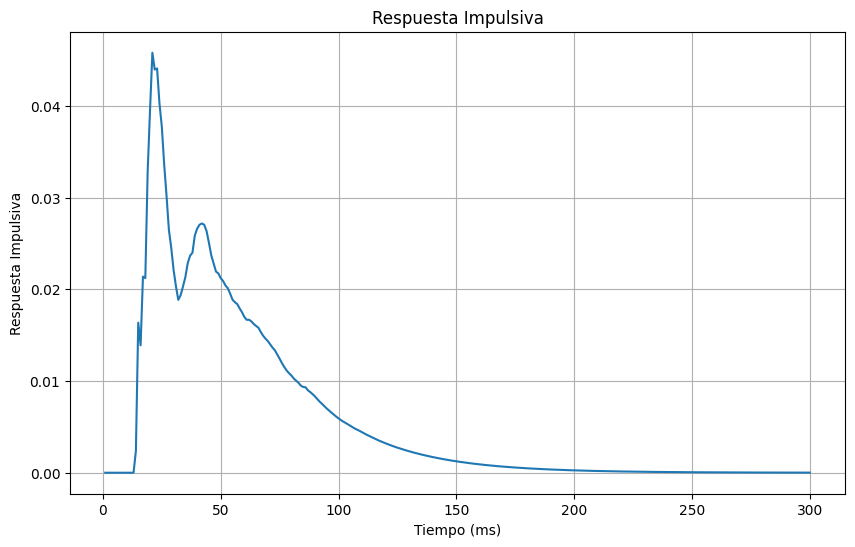

In [ ]:
primeros_1000_datos = df.head(300)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(primeros_1000_datos['Tiempo (ms)'], primeros_1000_datos['Respuesta Impulsiva'])
plt.xlabel('Tiempo (ms)')
plt.ylabel('Respuesta Impulsiva')
plt.title('Respuesta Impulsiva')
plt.grid(True)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778300 entries, 0 to 2778299
Data columns (total 5 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Respuesta Impulsiva  float64
 1   x                    float64
 2   y                    float64
 3   z                    float64
 4   Tiempo (ms)          int64  
dtypes: float64(4), int64(1)
memory usage: 106.0 MB


# Entrenamiento del modelo 1er  Modelo




> Usar cualquiera de los dos scalers para los datos, los resultados pueden variar de acuerdo a los siguiente conceptos:


## MinMaxScaler

In [ ]:
X = df[['x', 'y', 'z', 'Tiempo (ms)']]
y = df['Respuesta Impulsiva']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# Creación de un modelo red neuronal
model = Sequential()
model.add(Dense(3, activation='relu'))  # 3 para x, y, z
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))
# modelo con MSE como función de pérdida
optimizer = Adam(lr=0.03)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
# Entrenamiento del modelo
history = model.fit(X_train, y_train, validation_data=(X_test,
y_test), batch_size=128, epochs=5)
print("modelo entrenado!!")

Epoch 1/5
15194/15194 [==============================] - 84s 5ms/step - loss: 2.1639e-05 - mae: 0.0019 - val_loss: 9.7791e-06 - val_mae: 0.0011
Epoch 2/5
15194/15194 [==============================] - 86s 6ms/step - loss: 1.3899e-05 - mae: 0.0014 - val_loss: 1.4555e-05 - val_mae: 0.0013
Epoch 3/5
15194/15194 [==============================] - 92s 6ms/step - loss: 1.2513e-05 - mae: 0.0013 - val_loss: 1.2675e-05 - val_mae: 0.0010
Epoch 4/5
15194/15194 [==============================] - 92s 6ms/step - loss: 1.0726e-05 - mae: 0.0011 - val_loss: 4.7647e-06 - val_mae: 7.7905e-04
Epoch 5/5
15194/15194 [==============================] - 84s 6ms/step - loss: 9.5657e-06 - mae: 0.0011 - val_loss: 6.6460e-06 - val_mae: 0.0010
modelo entrenado!!


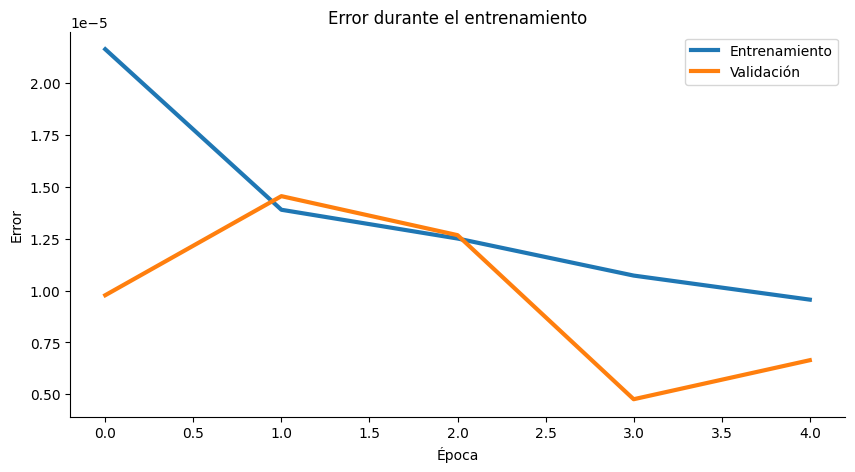

In [ ]:
loss = pd.DataFrame(model.history.history)
# gráfico para visualizar la pérdida.
plt.figure(figsize=(10, 5))
plt.title('Error durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error')
plt.plot(loss['loss'], label='Entrenamiento', lw=3)
plt.plot(loss['val_loss'], label='Validación', lw=3)
plt.legend()
sns.despine()
plt.show()

In [ ]:
model.save("Modelo_Respuesta_Impulsiva_MMS.h5")

In [ ]:
model = load_model("Modelo_Respuesta_Impulsiva_MMS.h5")

In [ ]:
# Evalúa el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
# Imprime la pérdida total en el conjunto de prueba
print(f'Pérdida total en conjunto de prueba: {test_loss}')

# Calcula el MAE promedio para todas las respuestas impulsivas en el conjunto de prueba
y_pred = model.predict(X_test)

# Asegúrate de que las dimensiones de y_test y y_pred sean compatibles
y_test = np.squeeze(y_test)
y_pred = np.squeeze(y_pred)

mae = np.mean(np.abs(y_test - y_pred))
# Imprime el MAE promedio en el conjunto de prueba
print(f'MAE promedio en conjunto de prueba: {mae}')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R^2 (Coeficiente de determinación): {r2}')


26047/26047 [==============================] - 69s 3ms/step - loss: 6.6460e-06 - mae: 0.0010
Pérdida total en conjunto de prueba: [6.645985649811337e-06, 0.001001963741146028]
26047/26047 [==============================] - 51s 2ms/step
MAE promedio en conjunto de prueba: 0.0010019649647884257
R^2 (Coeficiente de determinación): 0.9414399531479866


### Primera Predicción

In [ ]:
# Punto de la predicción (x, y, z)
x=-0.9
y=-0.9
z=-0.9
prediccion = []
warnings.filterwarnings("ignore", category=UserWarning)
for i in range (1,301):
    punto_tiempo = np.array([x, y, z, i])
    punto_tiempo_scaled = scaler.transform([punto_tiempo])
    prediccion.append(model.predict(punto_tiempo_scaled, verbose=False))
print("Predicción realizada")

Predicción realizada


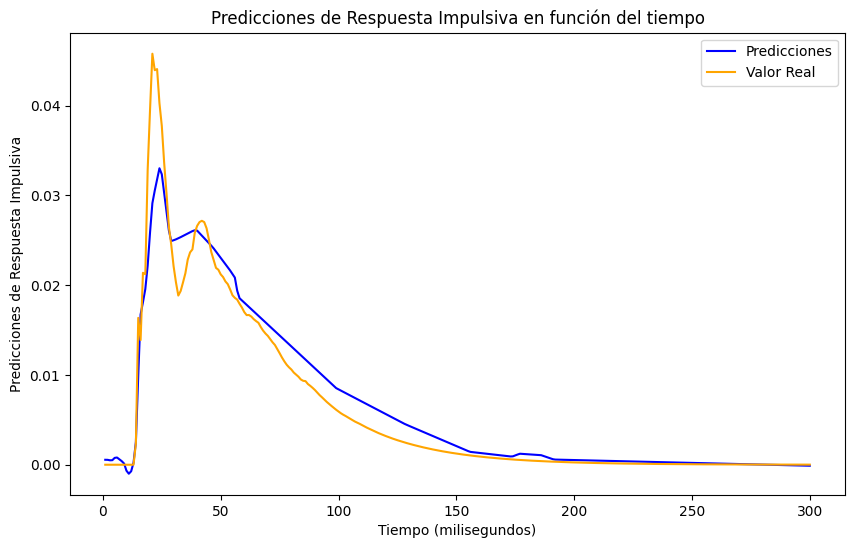

In [ ]:
predicciones_aplanadas = np.concatenate(prediccion)
# gráfico de línea de predicciones en función del tiempo
plt.figure(figsize=(10, 6))  # Esto establece el tamaño del gráfico (ajusta según tus preferencias)
# secuencia de tiempo de 1 a 1000 para mil milisegundos
secuencia_tiempo = np.arange(1, 301)
# eje x como la secuencia de tiempo y el eje y como las predicciones aplanadas
plt.plot(secuencia_tiempo, predicciones_aplanadas[:300], label='Predicciones', color='blue')
plt.plot(primeros_1000_datos['Tiempo (ms)'], primeros_1000_datos['Respuesta Impulsiva'],label='Valor Real',color ='orange')
#etiquetas a los ejes y un título al gráfico
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Predicciones de Respuesta Impulsiva')
plt.title('Predicciones de Respuesta Impulsiva en función del tiempo')
plt.legend()
plt.show()

### Segunda Prediccioón

In [ ]:
# Punto de la predicción (x, y, z)
x=0.3
y=0.7
z=-0.5
prediccion = []
warnings.filterwarnings("ignore", category=UserWarning)
for i in range (1,301):
    punto_tiempo = np.array([x, y, z, i])
    punto_tiempo_scaled = scaler.transform([punto_tiempo])
    prediccion.append(model.predict(punto_tiempo_scaled, verbose=False))
print("Predicción realizada")

Predicción realizada


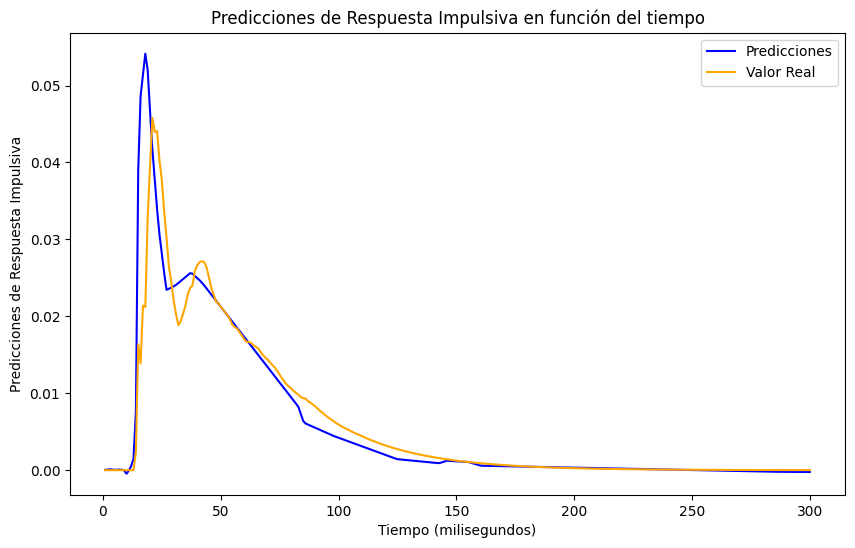

In [ ]:
predicciones_aplanadas = np.concatenate(prediccion)
# gráfico de línea de predicciones en función del tiempo
plt.figure(figsize=(10, 6))  # Esto establece el tamaño del gráfico (ajusta según tus preferencias)
# secuencia de tiempo de 1 a 1000 para mil milisegundos
secuencia_tiempo = np.arange(1, 301)
# eje x como la secuencia de tiempo y el eje y como las predicciones aplanadas
plt.plot(secuencia_tiempo, predicciones_aplanadas[:300], label='Predicciones', color='blue')
plt.plot(primeros_1000_datos['Tiempo (ms)'], primeros_1000_datos['Respuesta Impulsiva'],label='Valor Real',color ='orange')
# etiquetas a los ejes y un título al gráfico
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Predicciones de Respuesta Impulsiva')
plt.title('Predicciones de Respuesta Impulsiva en función del tiempo')
plt.legend()
plt.show()

# Entrenamiento del modelo 2do  Modelo

## Standard Scaler

In [ ]:
df = pd.read_csv("dataFinal.csv")

In [ ]:
df

,Respuesta Impulsiva,x,y,z,Tiempo (ms)
0,0.000000e+00,-0.9,-0.9,-0.9,1
1,0.000000e+00,-0.9,-0.9,-0.9,2
2,0.000000e+00,-0.9,-0.9,-0.9,3
3,0.000000e+00,-0.9,-0.9,-0.9,4
4,0.000000e+00,-0.9,-0.9,-0.9,5
...,...,...,...,...,...
9260995,3.670517e-15,0.9,1.0,0.9,996
9260996,3.556573e-15,0.9,1.0,0.9,997
9260997,3.446167e-15,0.9,1.0,0.9,998
9260998,3.339188e-15,0.9,1.0,0.9,999


In [ ]:
df = df.groupby(['x', 'y', 'z']).head(300).reset_index(drop=True)

In [ ]:
X = df[['x', 'y', 'z', 'Tiempo (ms)']]
y = df['Respuesta Impulsiva']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
# Creación de un modelo red neuronal
model = Sequential()
model.add(Dense(3, activation='relu'))  # 3 para x, y, z
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))
# modelo con MSE como función de pérdida
optimizer = Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
# Entrenamiento del modelo con los datos preprocesados
history = model.fit(X_train, y_train, validation_data=(X_test,
y_test), batch_size=128, epochs=5)
print("modelo entrenado!!")

Epoch 1/5
15194/15194 [==============================] - 80s 5ms/step - loss: 4.1289e-05 - mae: 0.0027 - val_loss: 1.3990e-05 - val_mae: 0.0011
Epoch 2/5
15194/15194 [==============================] - 74s 5ms/step - loss: 1.4327e-05 - mae: 0.0011 - val_loss: 1.0488e-05 - val_mae: 7.3149e-04
Epoch 3/5
15194/15194 [==============================] - 76s 5ms/step - loss: 1.2184e-05 - mae: 9.0656e-04 - val_loss: 9.4163e-06 - val_mae: 7.1850e-04
Epoch 4/5
15194/15194 [==============================] - 75s 5ms/step - loss: 1.1032e-05 - mae: 8.5571e-04 - val_loss: 1.3436e-05 - val_mae: 0.0013
Epoch 5/5
15194/15194 [==============================] - 72s 5ms/step - loss: 1.0764e-05 - mae: 8.5520e-04 - val_loss: 1.0052e-05 - val_mae: 0.0011
modelo entrenado!!


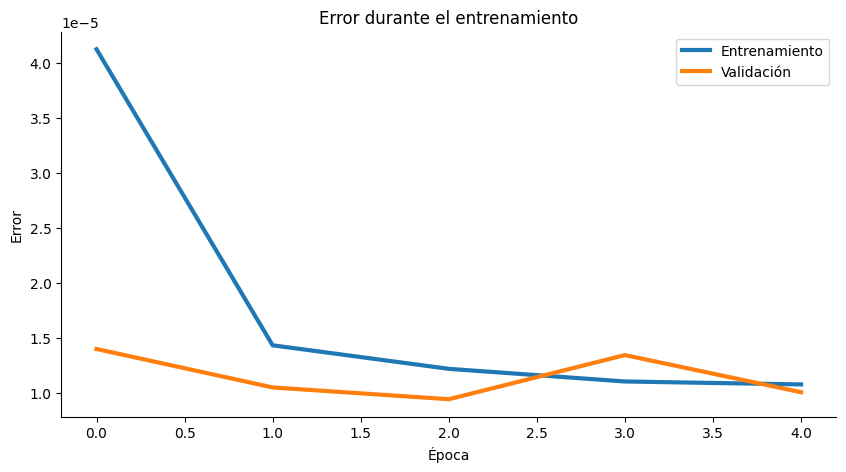

In [ ]:
loss = pd.DataFrame(model.history.history)
#gráfico para visualizar la pérdida.
plt.figure(figsize=(10, 5))
plt.title('Error durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error')
plt.plot(loss['loss'], label='Entrenamiento', lw=3)
plt.plot(loss['val_loss'], label='Validación', lw=3)
plt.legend()
sns.despine()
plt.show()

In [ ]:
model.save("Modelo_Respuesta_Impulsiva_SS.h5")

In [ ]:
model = load_model("Modelo_Respuesta_Impulsiva_SS.h5")

In [ ]:
# Evalúa el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test)
# Imprime la pérdida total en el conjunto de prueba
print(f'Pérdida total en conjunto de prueba: {test_loss}')

# Calcula el MAE promedio para todas las respuestas impulsivas en el conjunto de prueba
y_pred = model.predict(X_test)

# Asegúrate de que las dimensiones de y_test y y_pred sean compatibles
y_test = np.squeeze(y_test)
y_pred = np.squeeze(y_pred)

mae = np.mean(np.abs(y_test - y_pred))
# Imprime el MAE promedio en el conjunto de prueba
print(f'MAE promedio en conjunto de prueba: {mae}')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R^2 (Coeficiente de determinación): {r2}')


26047/26047 [==============================] - 66s 3ms/step - loss: 1.0052e-05 - mae: 0.0011
Pérdida total en conjunto de prueba: [1.005246213026112e-05, 0.0010650564217939973]
26047/26047 [==============================] - 48s 2ms/step
MAE promedio en conjunto de prueba: 0.0010650542896222604
R^2 (Coeficiente de determinación): 0.9114246944819908


### Primera Predicción

In [ ]:
# Punto de la predicción (x, y, z)
x=-0.9
y=-0.9
z=-0.9
prediccion = []
warnings.filterwarnings("ignore", category=UserWarning)
for i in range (1,301):
    punto_tiempo = np.array([x, y, z, i])
    punto_tiempo_scaled = scaler.transform([punto_tiempo])
    prediccion.append(model.predict(punto_tiempo_scaled, verbose=False))
print("Predicción realizada")

Predicción realizada


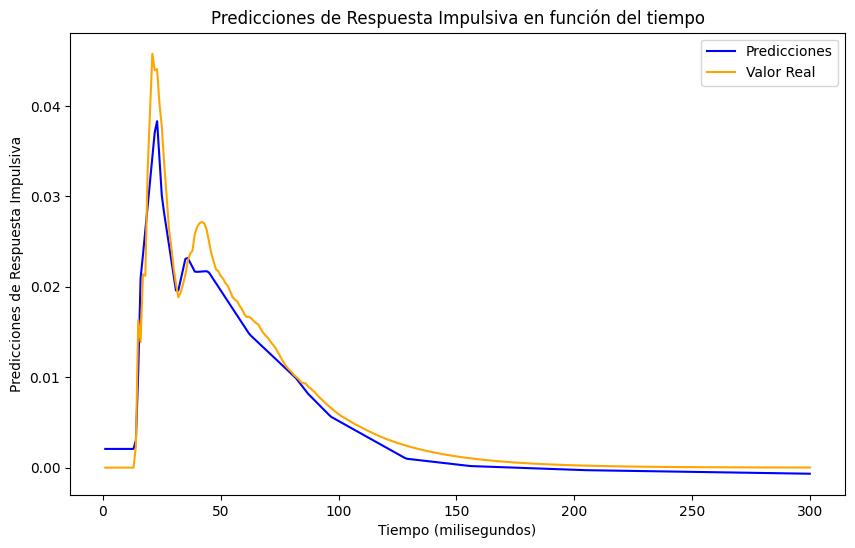

In [ ]:
predicciones_aplanadas = np.concatenate(prediccion)
# gráfico de línea de predicciones en función del tiempo
plt.figure(figsize=(10, 6))  # Esto establece el tamaño del gráfico (ajusta según tus preferencias)
# secuencia de tiempo de 1 a 1000 para mil milisegundos
secuencia_tiempo = np.arange(1, 301)
# eje x como la secuencia de tiempo y el eje y como las predicciones aplanadas
plt.plot(secuencia_tiempo, predicciones_aplanadas[:300], label='Predicciones', color='blue')
plt.plot(primeros_1000_datos['Tiempo (ms)'], primeros_1000_datos['Respuesta Impulsiva'],label='Valor Real',color ='orange')
# etiquetas a los ejes y un título al gráfico
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Predicciones de Respuesta Impulsiva')
plt.title('Predicciones de Respuesta Impulsiva en función del tiempo')
plt.legend()
plt.show()

In [ ]:
# Punto de la predicción (x, y, z)
x=0.3
y=0.7
z=-0.5
prediccion = []
warnings.filterwarnings("ignore", category=UserWarning)
for i in range (1,301):
    punto_tiempo = np.array([x, y, z, i])
    punto_tiempo_scaled = scaler.transform([punto_tiempo])
    prediccion.append(model.predict(punto_tiempo_scaled, verbose=False))
print("Predicción realizada")

Predicción realizada


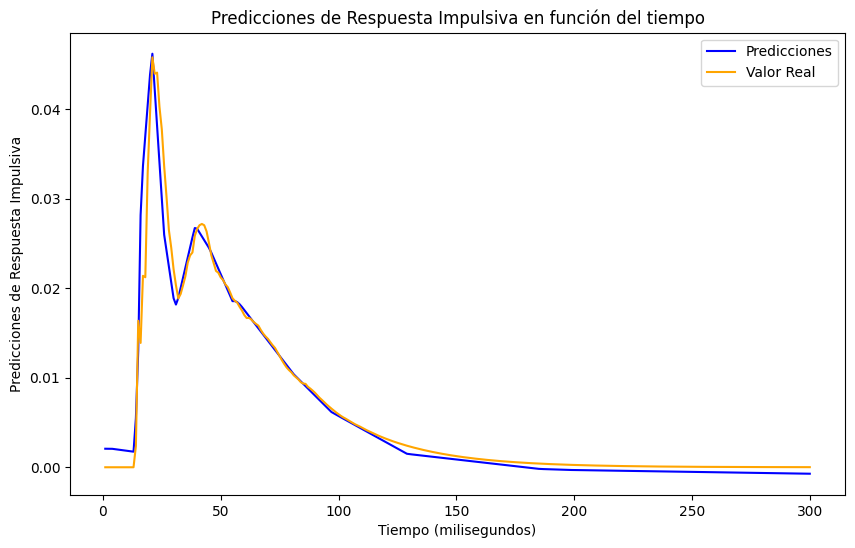

In [ ]:
predicciones_aplanadas = np.concatenate(prediccion)
# gráfico de línea de predicciones en función del tiempo
plt.figure(figsize=(10, 6))  # Esto establece el tamaño del gráfico (ajusta según tus preferencias)
# secuencia de tiempo de 1 a 1000 para mil milisegundos
secuencia_tiempo = np.arange(1, 301)
#eje x como la secuencia de tiempo y el eje y como las predicciones aplanadas
plt.plot(secuencia_tiempo, predicciones_aplanadas[:300], label='Predicciones', color='blue')
plt.plot(primeros_1000_datos['Tiempo (ms)'], primeros_1000_datos['Respuesta Impulsiva'],label='Valor Real',color ='orange')
#etiquetas a los ejes y un título al gráfico
plt.xlabel('Tiempo (milisegundos)')
plt.ylabel('Predicciones de Respuesta Impulsiva')
plt.title('Predicciones de Respuesta Impulsiva en función del tiempo')
plt.legend()
plt.show()